<a href="https://colab.research.google.com/github/Deepfull/BootCamp/blob/main/5%EC%A1%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%99%95%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 데이터확장

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 1-1
# 1-2
# 2-1
# 2-2
# 3-2
# 4-1
# 4-2

In [3]:
# case 1-1 데이터 읽음
data_11ca = pd.read_csv('https://raw.githubusercontent.com/eupshin/BootCamp/main/ca1_1.csv')
print(data_11ca.shape)
df_11ca = data_11ca.copy()

data_11oa = pd.read_csv('https://raw.githubusercontent.com/eupshin/BootCamp/main/oa1_1.csv')
print(data_11oa.shape)
df_11oa = data_11oa.copy()

(900, 7)
(90, 4)


In [4]:
# CA,RA 데이터 정리
df_11ca['time']=list(range(0,900))
df_11ca = df_11ca.drop('time1', axis=1)

# OA 데이터 정리
df_11oa = df_11oa.drop('time2', axis=1)
df = pd.DataFrame(columns=['OAPM10','OAPM2.5', 'OAPM1'])
for j in range(0,90):
  for i in range(0,10):
    df.loc[i+j*10] = df_11oa.loc[j][['OAPM10','OAPM2.5', 'OAPM1']]

# case 11 데이터 정리
df_11 = pd.concat([df_11ca,df],axis=1)

# 필터 : 전기집진(0), MERV(1)
df_11['filter_esp'] = 1
df_11['filter_merv'] = 0
# 순환 : 외기(0), 내기(1)
df_11['circulation_ex'] = 1
df_11['circulation_in'] = 0
# 풍량 : 강풍(0), 약풍(1)
df_11['flow rate_strong'] = 1
df_11['flow rate_weak'] = 0
# 공청기 : OFF(0), ON(1)
df_11['air purifier_off'] = 1
df_11['air purifier_on'] = 0

In [5]:
# case 1-2 데이터 읽음
data_12ca = pd.read_csv(
    'https://raw.githubusercontent.com/eupshin/BootCamp/main/ca1_2.csv')
print(data_12ca.shape)
df_12ca = data_12ca.copy()

data_12oa = pd.read_csv(
    'https://raw.githubusercontent.com/eupshin/BootCamp/main/oa1_2.csv')
print(data_12oa.shape)
df_12oa = data_12oa.copy()

(900, 7)
(90, 4)


In [6]:
# CA,RA 데이터 정리
df_12ca['time']=list(range(0,900))
df_12ca = df_12ca.drop('time1', axis=1)

# OA 데이터 정리
df_12oa = df_12oa.drop('time2', axis=1)
df = pd.DataFrame(columns=['OAPM10','OAPM2.5', 'OAPM1'])
for j in range(0,90):
  for i in range(0,10):
    df.loc[i+j*10] = df_12oa.loc[j][['OAPM10','OAPM2.5', 'OAPM1']]

# case 11 데이터 정리
df_12 = pd.concat([df_12ca,df],axis=1)

# 필터 : 전기집진(0), MERV(1)
df_12['filter_esp'] = 1
df_12['filter_merv'] = 0
# 순환 : 외기(0), 내기(1)
df_12['circulation_ex'] = 1
df_12['circulation_in'] = 0
# 풍량 : 강풍(0), 약풍(1)
df_12['flow rate_strong'] = 1
df_12['flow rate_weak'] = 0
# 공청기 : OFF(0), ON(1)
df_12['air purifier_off'] = 0
df_12['air purifier_on'] = 1

In [9]:
# t = t0일 때의 농도 값으로 t = t0 + 100일때의 농도 값을 예측 
# 학습데이터
# X           y
# data @ t=0  data @ t=10
# data @ t=1  data @ t=11
# data @ t=2  data @ t=12
# data @ t=3  data @ t=13

df1_x = df_11[['CAPM10', 'CAPM2.5', 'CAPM1', 
               'OAPM10', 'OAPM2.5', 'OAPM1', 
               'filter_esp', 'filter_merv', 
               'circulation_ex', 'circulation_in', 
               'flow rate_strong', 'flow rate_weak', 
               'air purifier_off', 'air purifier_on']][:800]
df1_y = df_11[['CAPM10', 'CAPM2.5', 'CAPM1', 
               'RAPM10', 'RAPM2.5', 'RAPM1']][100:900]
df2_x = df_12[['CAPM10', 'CAPM2.5', 'CAPM1', 
               'OAPM10', 'OAPM2.5', 'OAPM1', 
               'filter_esp', 'filter_merv', 
               'circulation_ex', 'circulation_in', 
               'flow rate_strong', 'flow rate_weak', 
               'air purifier_off', 'air purifier_on']][:800]
df2_y = df_12[['CAPM10', 'CAPM2.5', 'CAPM1', 
               'RAPM10', 'RAPM2.5', 'RAPM1']][100:900]

df_x = pd.concat([df1_x, df2_x]) 
df_y = pd.concat([df1_y, df2_y])

In [10]:
df_x.shape

(1600, 14)

In [11]:
df_y.shape

(1600, 6)

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state=9)

In [13]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train =np.array(y_train)
y_test = np.array(y_test)

In [14]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.4585129996920247

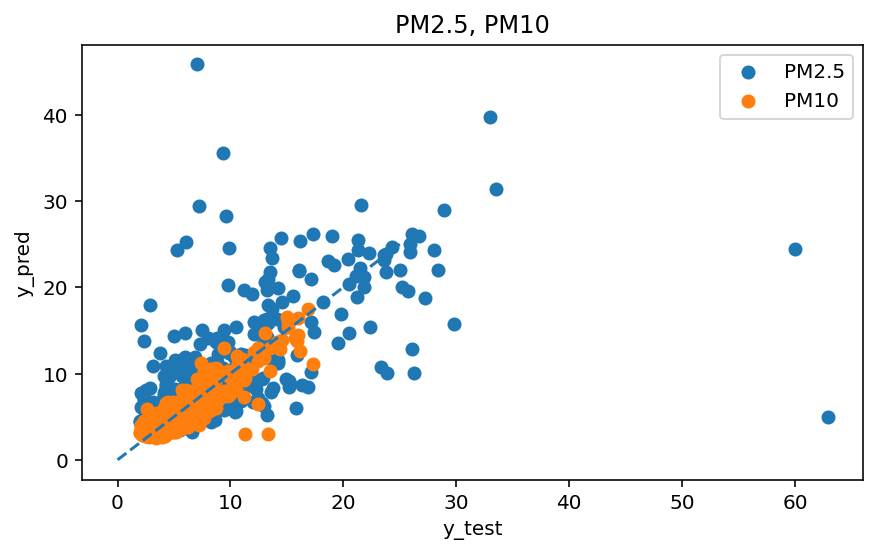

In [15]:
y_pred = rfr.predict(X_test)

plt.figure(figsize=(7,4))
plt.scatter(y_test[:,0],y_pred[:,0])
plt.scatter(y_test[:,1],y_pred[:,1])
plt.title('PM2.5, PM10')
plt.legend(['PM2.5','PM10'])
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.plot([0,25],[0,25],'--')

In [ ]:
# t0 에서의 값으로 (t0+1) ~ (t0+10) 사이의 값을 예측
# 학습데이터
# X           y
# data @ t=0  data @ t=1~10
# data @ t=1  data @ t=2~11
# data @ t=2  data @ t=3~12
# data @ t=3  data @ t=4~13
#
# 만약에 t = (t0+1) ~ (t0+20) 사이의 값을 예측하고 싶다면
# 위의 학습으로 예측된 t0+10값을 X로 입력하여 다음 10개 time step 값을 예측함
# Sequential regression

# Linear Model(여러번 돌려야됨), MLP

# LSTM을 통한 시계열 예측, MLP의 depth가 있음